In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import SVG, display, display_png 
import plotly.io as pio 

from datetime import datetime

import os

<b style = "color:lightblue">OS GRÁFICOS DO PLOTLY AINDA NÃO ESTÃO EM DASHBOARD, PRECISAM SER BAIXADOS E EXECUTADOS PARA QUE POSSAM SER USADOS</b>

In [2]:
dir_path = os.listdir(r'dados')
names_f = [name.split('_')[1] for name  in dir_path] 
google = pd.read_csv(r'google/multiTimeline.csv')

In [3]:
# load all categories in a dict
categories = {}
for path,names in zip(dir_path,names_f):
    categories[names] = pd.read_excel(rf'dados\{path}')
    categories[names] = categories[names].drop(['Unnamed: 0'], axis = 1)

KeyboardInterrupt: 

In [ ]:
def count_columns(dataframe, column = str, target_column = str, unique_count = False):
  df = dataframe
  count_all = {}
  uniques = df[target_column].unique()
  for i in uniques:
    count_all[i] = df.query(f'{target_column} == {i}')[column].sum()
  count_all_df = pd.DataFrame(list(count_all.items())).rename({0: target_column, 1: column}, axis = 1).sort_values(by = [target_column])
  return count_all_df

In [ ]:
estoque_preco = {}

for i in categories.keys():
    estoque_preco[i] = [count_columns(categories[i],'Estoque', 'Mês'),count_columns(categories[i],'Preço', 'Mês')]

In [ ]:
for i in categories:
    data = []
    for j in range(len(categories[i])):
        str_date = f'{categories[i].Dia[j]}/{categories[i].Mês[j]}/{categories[i].Ano[j]}'
        str_date = datetime.strptime(str_date,'%d/%m/%Y')
        str_date = str_date.date()
        data.append(str_date)
    categories[i]['Data'] = data

In [ ]:
#função de diminuição de dimensionalidade de listas
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

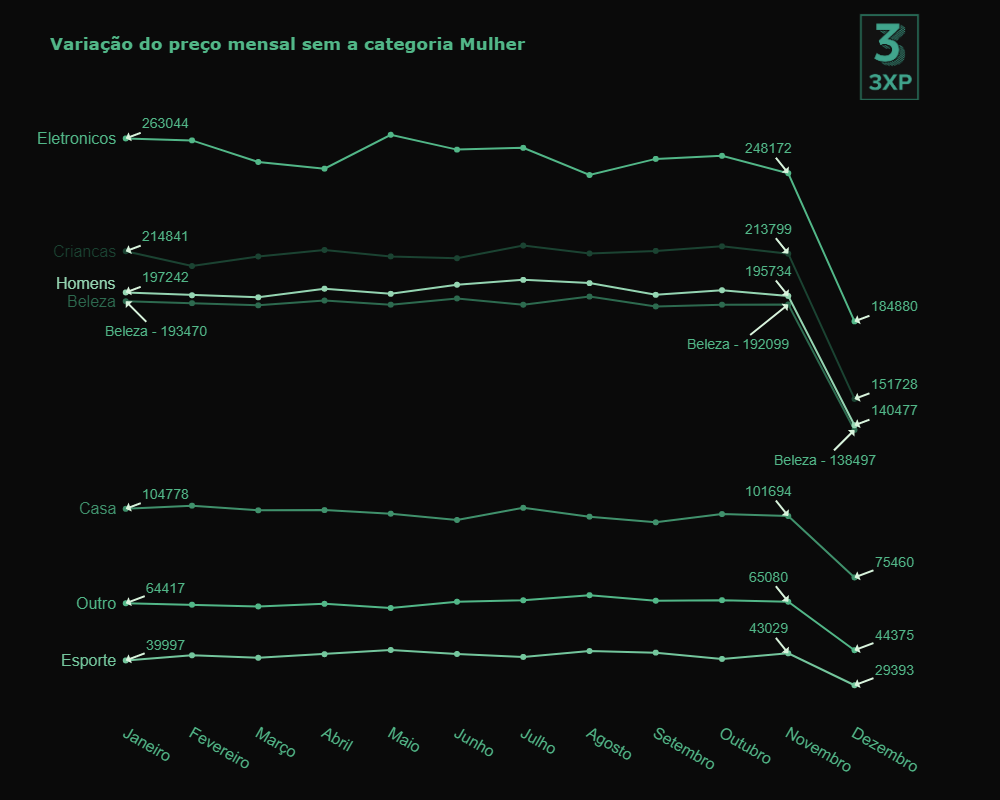

In [ ]:
color = {'green_palette': ['#2d6a4f', '#40916c', '#1b4332', '#52b788', '#74c69d', '#95d5b2','#d8f3dc','#52b788']}
fig = go.Figure()
annotations = []
for i,j in zip(categories,color['green_palette']):
        texto = [int(round(x,0)) for x in estoque_preco[i][1]['Preço'].reset_index(drop=True)]
        if i != 'Mulher':
                fig.add_trace(
                go.Scatter(
                        x = estoque_preco[i][1]['Mês'].reset_index(drop=True),
                        y = estoque_preco[i][1]['Preço'].reset_index(drop=True),
                        legendgroup = i,
                        marker_color = j,
                        name = i,
                        showlegend = False
                                ))
                
                if i == 'Homens':
                        fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+4000,
                                                xanchor='right', yanchor='middle',
                                                text=i,
                                                font=dict(family='Arial',
                                                        size=16,
                                                        color = j),
                                                showarrow=False
                                                ,))
                else:
                        fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                                                xanchor='right', yanchor='middle',
                                                text=i,
                                                font=dict(family='Arial',
                                                        size=16,
                                                        color = j),
                                                showarrow=False
                                                ,))
                for z in [0,10,11]:
                        if i != 'Beleza':
                                if z == 10:
                                        fig.add_annotation(
                                                x=estoque_preco[i][1]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=texto[z],
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=-20,
                                                ay=-25,
                                                )
                                else:
                                        fig.add_annotation(
                                        x=estoque_preco[i][1]['Mês'].reset_index(drop=True)[z],
                                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[z],
                                        xref="x",
                                        yref="y",
                                        text=texto[z],
                                        showarrow=True,
                                        font=dict(
                                                family="Arial",
                                                size=14,
                                                color="#52b788"
                                                ),
                                        align="right",
                                        arrowhead=1,
                                        arrowsize=0.8,
                                        arrowwidth=2,
                                        arrowcolor="#d8f3dc",
                                        ax=40,
                                        ay=-15,
                                        )      
                        else:
                                if z == 10:
                                        fig.add_annotation(
                                                x=estoque_preco[i][1]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text= (f'Beleza - {texto[z]}'),
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=-50,
                                                ay=40,
                                                )    

                                elif z == 0:
                                        fig.add_annotation(
                                                x=estoque_preco[i][1]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=(f'Beleza - {texto[z]}'),
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=30,
                                                ay=30,
                                                )                                                     
                                else:
                                                fig.add_annotation(
                                                x=estoque_preco[i][1]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=((f'Beleza - {texto[z]}')),
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=-30,
                                                ay=30,
                                                )                               
                
                
        else:
                fig1 = go.Figure()
                fig1.add_trace(
                        go.Scatter(
                        x = estoque_preco[i][1]['Mês'].reset_index(drop=True),
                        y = estoque_preco[i][1]['Preço'].reset_index(drop=True),
                        legendgroup = i,
                        marker_color = j,
                        name = i,
                        showlegend = False
                                ))

                fig1.add_annotation(dict(xref='paper', x=0.01, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ,))

fig.update_layout(
    autosize = False,
    title = '<b style = "color:#52b788">Variação do preço mensal sem a categoria Mulher</b>',
    width=1000,
    height=800,
    paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
    plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
)

fig.update_xaxes(showgrid=False,  color = '#52b788', 
                tickvals = [x for x in range(1,13)],
                ticktext = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro','Novembro', 'Dezembro'],
                tickfont = dict(
                        family='Arial',
                        size=16,
                        color = '#52b788')
)
fig.update_yaxes(visible = False, showgrid=False)

# adiciona uma logo ao gráfico
fig.add_layout_image(
dict(
        source='https://i.imgur.com/ik6ADIS.png',
        xref="paper", yref="paper",
        x=1.00, y=1.00,
        sizex=0.14, sizey=0.14,
        xanchor="right", yanchor="bottom" # define a origem do logo
)
)     

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show()   

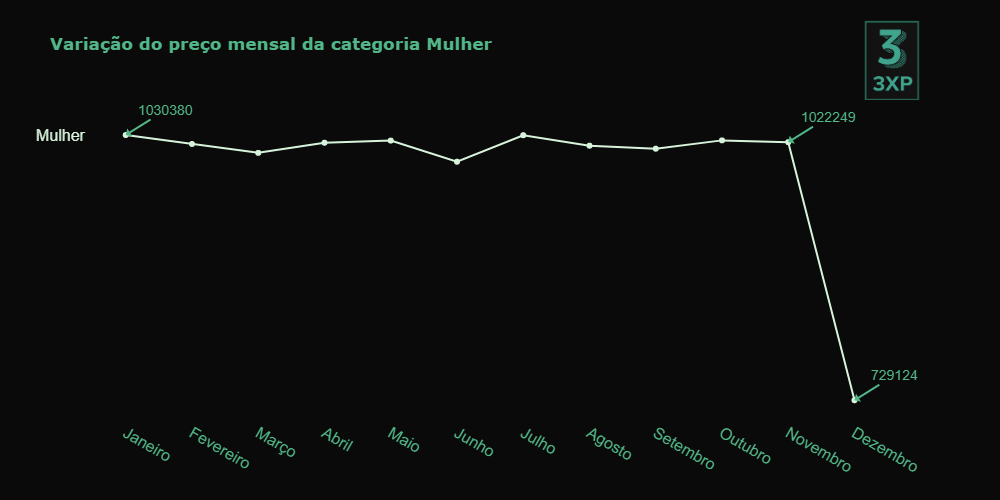

In [ ]:
fig1.update_layout(
    autosize = False,
    title = "<b style = 'color:#52b788'>Variação do preço mensal da categoria Mulher</b>",
    width=1000,
    height=500,
    paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
    plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
)

fig1.update_xaxes(showgrid=False,  color = '#52b788', 
                tickvals = [x for x in range(1,13)],
                ticktext = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro','Novembro', 'Dezembro'],
                tickfont = dict(
                        family='Arial',
                        size=16,
                        color = '#52b788')
)

for z in [0,10,11]:
        fig1.add_annotation(
                x=estoque_preco['Mulher'][1]['Mês'].reset_index(drop=True)[z],
                y=estoque_preco['Mulher'][1]['Preço'].reset_index(drop=True)[z],
                xref="x",
                yref="y",
                text=int(round(estoque_preco['Mulher'][1]['Preço'].reset_index(drop=True)[z],0)),
                showarrow=True,
                font=dict(
                        family="Arial",
                        size=14,
                        color="#52b788"
                        ),
                align="right",
                arrowhead=1,
                arrowsize=0.8,
                arrowwidth=2,
                arrowcolor="#52b788",
                ax=40,
                ay=-25,
                )


fig1.update_yaxes(visible = False, showgrid=False)

# adiciona uma logo ao gráfico
fig1.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.00, y=1.00,
                sizex=0.25, sizey=0.25,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)       

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig1.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig1.show() 

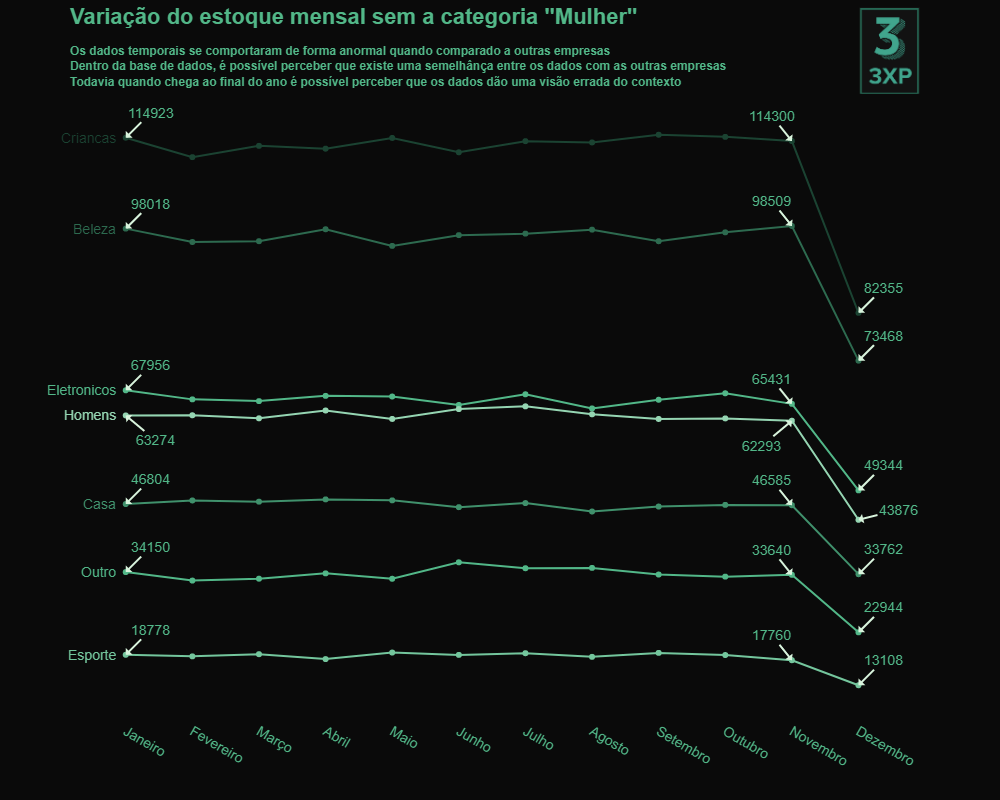

In [ ]:
color = {'green_palette': ['#2d6a4f', '#40916c', '#1b4332', '#52b788', '#74c69d', '#95d5b2','#d8f3dc','#52b788']}
fig = go.Figure()
annotations = []
for i,j in zip(categories,color['green_palette']):
        texto = [str(x) for x in estoque_preco[i][0]['Estoque'].reset_index(drop=True)]
        if i != 'Mulher':
                fig.add_trace(
                go.Scatter(
                        x = estoque_preco[i][0]['Mês'].reset_index(drop=True),
                        y = estoque_preco[i][0]['Estoque'].reset_index(drop=True),
                        marker_color = j,
                        name = i,
                        showlegend = False,
                        textfont=dict(
                                family="Droid Sans Mono",
                                size=18,
                                color="#52b788"
                                ))).update_traces(textposition='top center')

                for z in [0,10,11]:
                        if i != 'Homens':
                                if z == 10:
                                        fig.add_annotation(
                                                x=estoque_preco[i][0]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=texto[z],
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=-20,
                                                ay=-25,
                                                )
                                else:
                                        fig.add_annotation(
                                        x=estoque_preco[i][0]['Mês'].reset_index(drop=True)[z],
                                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[z],
                                        xref="x",
                                        yref="y",
                                        text=texto[z],
                                        showarrow=True,
                                        font=dict(
                                                family="Arial",
                                                size=14,
                                                color="#52b788"
                                                ),
                                        align="right",
                                        arrowhead=1,
                                        arrowsize=0.8,
                                        arrowwidth=2,
                                        arrowcolor="#d8f3dc",
                                        ax=25,
                                        ay=-25,
                                        )      
                        else:
                                if z == 10:
                                        fig.add_annotation(
                                                x=estoque_preco[i][0]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=texto[z],
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=-30,
                                                ay=25,
                                                )    

                                elif z == 0:
                                        fig.add_annotation(
                                                x=estoque_preco[i][0]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=texto[z],
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=30,
                                                ay=25,
                                                )                                                     
                                else:
                                                fig.add_annotation(
                                                x=estoque_preco[i][0]['Mês'].reset_index(drop=True)[z],
                                                y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[z],
                                                xref="x",
                                                yref="y",
                                                text=texto[z],
                                                showarrow=True,
                                                font=dict(
                                                        family="Arial",
                                                        size=14,
                                                        color="#52b788"
                                                        ),
                                                align="right",
                                                arrowhead=1,
                                                arrowsize=0.8,
                                                arrowwidth=2,
                                                arrowcolor="#d8f3dc",
                                                ax=40,
                                                ay=-10,
                                                )                             

                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=14,
                                                color = j),
                                        showarrow=False
                                        ,))
                
        else:
                fig1 = go.Figure()
                fig1.add_trace(
                        go.Scatter(
                        x = estoque_preco[i][0]['Mês'].reset_index(drop=True),
                        y = estoque_preco[i][0]['Estoque'].reset_index(drop=True),
                        legendgroup = i,
                        marker_color = j,
                        name = i,
                        showlegend = False
                                ))

                fig1.add_annotation(dict(xref='paper', x=0.01, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=14,
                                                color = j),
                                        showarrow=False
                                        ,))


fig.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Variação do estoque mensal sem a categoria "Mulher"</br></b><b style = "color:#52b788"><br>Os dados temporais se comportaram de forma anormal quando comparado a outras empresas</br>Dentro da base de dados, é possível perceber que existe uma semelhânça entre os dados com as outras empresas<br>Todavia quando chega ao final do ano é possível perceber que os dados dão uma visão errada do contexto</b>',
                'font_family':"Arial",
                'font_size':12,
                'y': 0.99,
                'x': 0.07,
                'xanchor': 'left',
                'yanchor': 'top'},
        width=1000,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
)

fig.update_xaxes(showgrid=False,  color = '#52b788', 
                tickvals = [x for x in range(1,13)],
                ticktext = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro','Novembro', 'Dezembro'],
                tickfont = dict(
                        family='Arial',
                        size=14,
                        color = '#52b788')
)
fig.update_yaxes(visible = False, showgrid=False)

# adiciona uma logo ao gráfico
fig.add_layout_image(
dict(
        source='https://i.imgur.com/ik6ADIS.png',
        xref="paper", yref="paper",
        x=1.00, y=1.01,
        sizex=0.14, sizey=0.14,
        xanchor="right", yanchor="bottom" # define a origem do logo
)
)     

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show() 

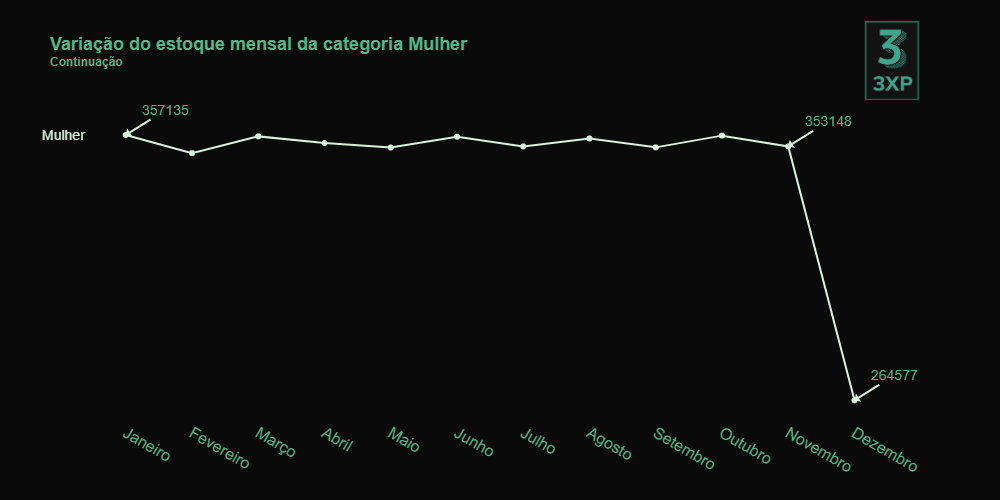

In [ ]:
fig1.update_layout(
        autosize = False,
        title = {'text': "<b style = 'color:#52b788;font-size:18'>Variação do estoque mensal da categoria Mulher</b><br><b style = 'color:#52b788'>Continuação</b>",
                'font_family':"Arial",
                'font_size':12,
                'y': 0.9,
                'x': 0.05,
                'xanchor': 'left',
                'yanchor': 'top'},
        width=1000,
        height=500,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
)

fig1.update_xaxes(showgrid=False,  color = '#52b788', 
                tickvals = [x for x in range(1,13)],
                ticktext = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro','Novembro', 'Dezembro'],
                tickfont = dict(
                        family='Arial',
                        size=16,
                        color = '#52b788')
)

for z in [0,10,11]:
        fig1.add_annotation(
                x=estoque_preco['Mulher'][0]['Mês'].reset_index(drop=True)[z],
                y=estoque_preco['Mulher'][0]['Estoque'].reset_index(drop=True)[z],
                xref="x",
                yref="y",
                text=str(estoque_preco['Mulher'][0]['Estoque'].reset_index(drop=True)[z]),
                showarrow=True,
                font=dict(
                        family="Arial",
                        size=14,
                        color="#52b788"
                        ),
                align="right",
                arrowhead=1,
                arrowsize=0.8,
                arrowwidth=2,
                arrowcolor="#d8f3dc",
                ax=40,
                ay=-25,
                )
fig1.update_yaxes(visible = False, showgrid=False)

# adiciona uma logo ao gráfico
fig1.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.00, y=1.00,
                sizex=0.25, sizey=0.25,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)       

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig1.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig1.show() 

In [ ]:
google.rename(columns = {
        'Mercado Livre: (Brasil)':'Mercado Livre' , 
        'Americanas: (Brasil)':'Americanas',
        'Netshoes: (Brasil)': 'Netshoes',
        'Magazine Luiza: (Brasil)':'Magazine Luiza',
        'Submarino: (Brasil)':'Submarino'}, inplace = True)

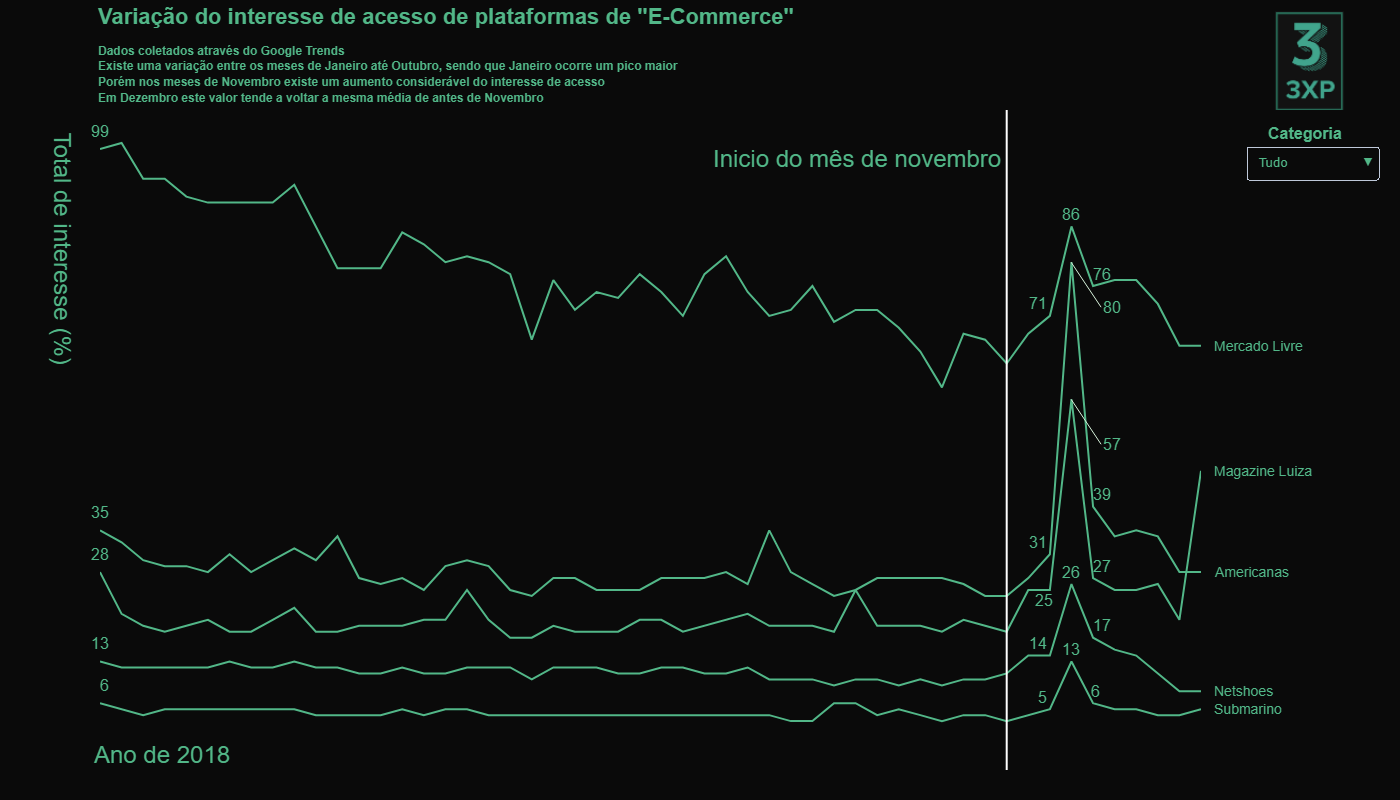

In [ ]:
fig1 = go.Figure()

columns = ['Mercado Livre', 'Americanas',
       'Netshoes', 'Magazine Luiza',
       'Submarino']


fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[0]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[1]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[2]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[3]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[4]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)                             
        

anot = {}
for i in columns:
        #Adiciona o nome dos sites
        if i != 'Submarino':
                anot[i] = [dict(xref='paper', x=0.01, y=google[i][0]+3,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][0]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),
                        dict(xref='paper', x=0.86, y=google[i][44]+2,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][44]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),

                        dict(xref='paper', x=0.882, y=google[i][45]+2,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][45]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),
                                
                        dict(xref='paper', x=0.925, y=google[i][46]+3,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][46]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),
                        dict(xref='paper', x=0.82, y=100,
                        xanchor='right', yanchor='top',
                        text='Inicio do mês de novembro',
                        font=dict(family='Arial',
                                size=24,
                                color = '#52b788'),
                        showarrow = False
                        ),
                        dict(xref='paper', x=-0.02, y=102,
                        xanchor='right', yanchor='top',
                        text='Total de interesse (%)',
                        font=dict(family='Arial',
                                size=24,
                                color = '#52b788'),
                        showarrow=False,
                        textangle=90
                        ),
                        dict(xref='paper', x=0.12, y=0,
                        xanchor='right', yanchor='top',
                        text='Ano de 2018',
                        font=dict(family='Arial',
                                size=24,
                                color = '#52b788'),
                        showarrow=False
                        ),
                        dict(xref='paper', x=1.01, y=google[i][51],
                                xanchor='left', yanchor='middle',
                                text=i,
                                font=dict(family='Arial',
                                        size=14,
                                        color = '#52b788'),
                        showarrow=False
                        ),
                        dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False)]
        else:
                anot[i] = [dict(xref='paper', x=0.01, y=google[i][0]+3,
                xanchor='right', yanchor='middle',
                text=int(google[i][0]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),
                dict(xref='paper', x=0.86, y=google[i][44]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),

                dict(xref='paper', x=0.882, y=google[i][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),
                        
                dict(xref='paper', x=0.912, y=google[i][46]+3,
                xanchor='right', yanchor='middle',
                text=int(google[i][46]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),
                dict(xref='paper', x=0.82, y=100,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow = False
                ),
                dict(xref='paper', x=-0.02, y=102,
                xanchor='right', yanchor='top',
                text='Total de interesse (%)',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False,
                textangle=90
                ),
                dict(xref='paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False
                ),
                dict(xref='paper', x=1.01, y=google[i][51],
                        xanchor='left', yanchor='middle',
                        text=i,
                        font=dict(family='Arial',
                                size=14,
                                color = '#52b788'),
                showarrow=False
                )]
        fig1.add_annotation(dict(xref='paper', x=1.01, y=google[i][51],
                        xanchor='left', yanchor='middle',
                        text=i,
                        font=dict(family='Arial',
                                size=14,
                                color = '#52b788'),
                        showarrow=False
                        ,))

        fig1.add_annotation(dict(xref='paper', x=0.01, y=google[i][0]+3,
                xanchor='right', yanchor='middle',
                text=int(google[i][0]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False
                ,))

        if i in ['Americanas', 'Magazine Luiza']:
                fig1.add_annotation(dict(xref='paper', x=0.882, y=google[i][45],
                xanchor='left', yanchor='middle',
                text=int(google[i][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=True,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=30,
                ay=45
                ))
        else:
                fig1.add_annotation(dict(xref='paper', x=0.892, y=google[i][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45
                ))
        if i == 'Magazine Luiza':
                fig1.add_annotation(dict(xref='paper', x=0.867, y=google[i][44],
                xanchor='right', yanchor='top',
                text=int(google[i][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=-10,
                ay=-40
                ))
        else:
                fig1.add_annotation(dict(xref='paper', x=0.862, y=google[i][44]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=-10,
                ay=-40
                ))
        if i == 'Submarino':
                fig1.add_annotation(dict(xref='paper', x=0.91, y=google[i][46]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][46]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=20,
                ay=-25
                ))
        else:
                fig1.add_annotation(dict(xref='paper', x=0.92, y=google[i][46]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][46]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=20,
                ay=-25
                ))

columns = ['Mercado Livre', 'Americanas',
       'Netshoes', 'Magazine Luiza',
       'Submarino']
all_list = []

all_list.append([anot[columns[0]][7],anot[columns[1]][7],anot[columns[2]][7],anot[columns[3]][7],anot[columns[4]][7],
                anot[columns[0]][0],anot[columns[1]][0],anot[columns[2]][0],anot[columns[3]][0],anot[columns[4]][0],
                anot[columns[0]][1],anot[columns[1]][1],anot[columns[2]][1],anot[columns[4]][1],
                anot[columns[0]][3],anot[columns[1]][3],anot[columns[2]][3],anot[columns[3]][3],anot[columns[4]][3],
                dict(xref='paper', x=0.892, y=google[columns[0]][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[columns[0]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45),
                dict(xref='paper', x=0.892, y=google[columns[2]][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[columns[2]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45),
                dict(xref='paper', x=0.892, y=google[columns[4]][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[columns[4]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45),
                dict(xref='paper', x=0.882, y=google[columns[1]][45],
                xanchor='left', yanchor='middle',
                text=int(google[columns[1]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=True,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=30,
                ay=45),
                dict(xref='paper', x=0.867, y=google[columns[3]][44],
                xanchor='right', yanchor='top',
                text=int(google[columns[3]][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=-10,
                ay=-40
                ),
                dict(xref='paper', x=0.882, y=google[columns[3]][45],
                xanchor='left', yanchor='middle',
                text=int(google[columns[3]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=True,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=30,
                ay=45),
                dict(xref='paper', x=0.82, y=100,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow = False
                ),
                dict(xref='paper', x=-0.02, y=102,
                xanchor='right', yanchor='top',
                text='Total de interesse (%)',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False,
                textangle=90
                ),
                dict(xref='paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False
                ),
                dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False)])

all_list = flatten_list(flatten_list(all_list))

anot['Tudo'] = all_list


fig1.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Variação do interesse de acesso de plataformas de "E-Commerce"</br></b><b style = "color:#52b788"><br>Dados coletados através do Google Trends</br>Existe uma variação entre os meses de Janeiro até Outubro, sendo que Janeiro ocorre um pico maior<br>Porém nos meses de Novembro existe um aumento considerável do interesse de acesso<br>Em Dezembro este valor tende a voltar a mesma média de antes de Novembro</b>',
                'font_family':"Arial",
                'font_size':12,
                'y': 0.99,
                'x': 0.07,
                'xanchor': 'left',
                'yanchor': 'top'},
        margin=dict(
        l=100,
        r=150,
        b=30,
        t=110,
        pad=5
        ),
        width=1400,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico 
        updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'visible': [True,True,True,True,True]},{'annotations': [i for i in anot['Tudo']]}],
                    label='Tudo',
                    method="update"
                ),
                dict(
                    args=[{'visible': [True,False,False,False,False]},{'annotations': [i for i in anot[columns[0]]]}],
                    label=columns[0],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,True,False,False,False]},{'annotations': [i for i in anot[columns[1]]]}],
                    label=columns[1],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,False,True,False,False]},{'annotations': [i for i in anot[columns[2]]]}],
                    label=columns[2],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,False,False,True,False]},{'annotations': [i for i in anot[columns[3]]]}],
                    label=columns[3],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,False,False,False,True]},{'annotations': [i for i in anot[columns[4]]]}],
                    label=columns[4],
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.17,
            xanchor="right",
            y=0.96,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
    ],)

fig1.add_annotation(dict(xref='paper', x=-0.02, y=102,
                xanchor='right', yanchor='top',
                text='Total de interesse (%)',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow=False,
                textangle=90
                ))


fig1.add_annotation(dict(xref='paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow=False
                ))   

fig1.add_vline(x=google['Semana'][42], line_color = 'white')

fig1.add_annotation(dict(xref='paper', x=0.82, y=100,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow = False
                ))

fig1.update_xaxes(showgrid=False,showticklabels=False, visible = False)
fig1.update_yaxes(showgrid=False,visible = False)

fig1.add_annotation(dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig1.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.13, y=1.00,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig1.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################
# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO 
# fig1.show() 

In [ ]:
dates = {}
for i in categories:
    dates[i] = categories[i].copy()
    dates[i]['Data'] = dates[i]['Data'].astype('str')
    dates_unique = dates[i]['Data'].unique()
    count_all = {}
    for j in dates_unique:
        count_all[j] = dates[i].query(f'Data == "{j}"')['Data'].count()
    dates[i] = pd.Series(count_all ,index = [i for i in count_all.keys()])
    dates[i] = dates[i].reset_index().rename(columns={0:'Total', 'index':'Data'})
    dates[i]['Data'] = pd.to_datetime(dates[i]['Data'])
    dates[i].sort_values(by = ['Data'], inplace= True)
    

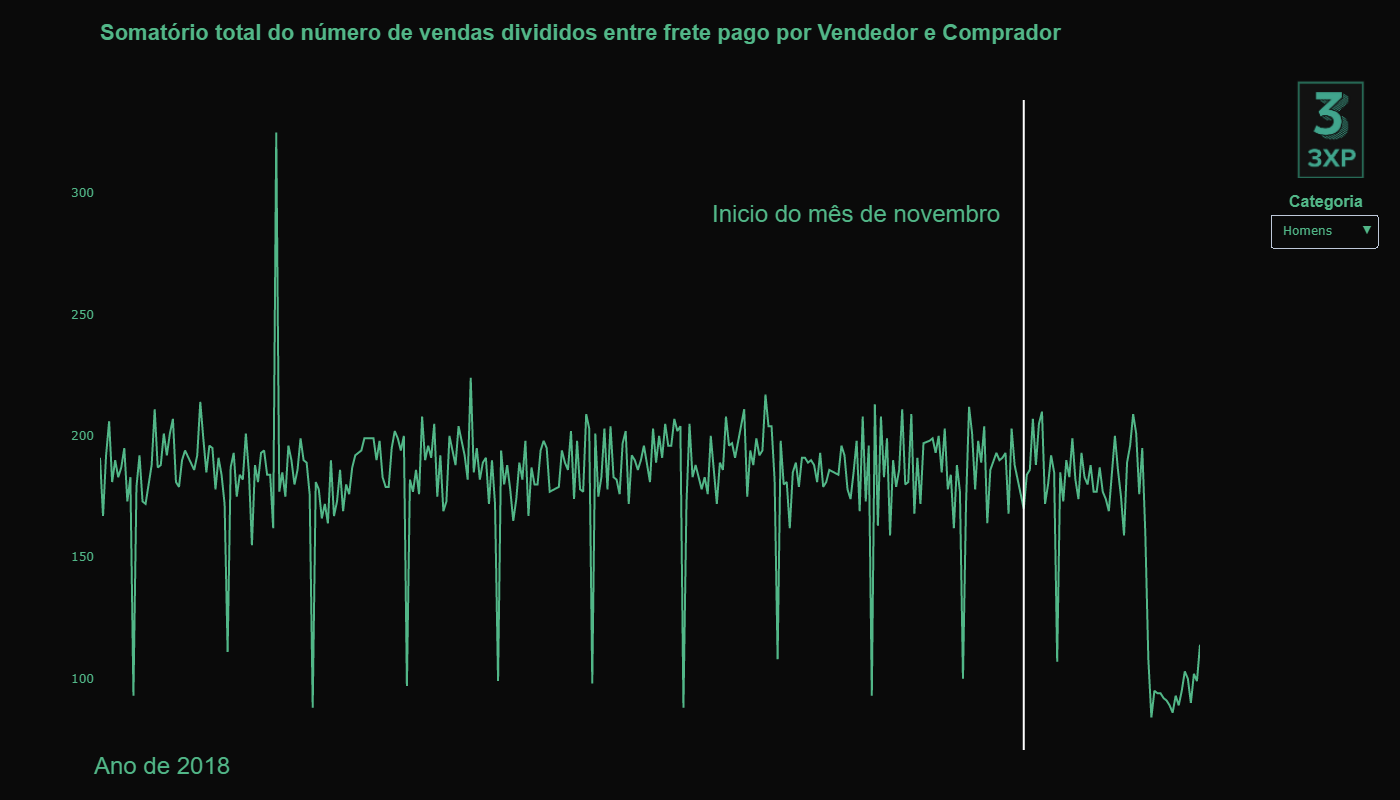

In [ ]:
fig = go.Figure()

fig.add_trace(
      go.Scatter
      (
      x = dates['Homens']['Data'].values,
      y = dates['Homens']['Total'].values,
      name = 'Frete pelo comprador',
      marker_color = '#52b788',
    )
)


fig.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Somatório total do número de vendas divididos entre frete pago por Vendedor e Comprador</br>',
                'font_family':"Arial",
                'font_size':12,
                'xref' :'paper',
                'y': 0.97,
                'x': 0,
                'xanchor': 'left',
                'yanchor': 'bottom'},
        margin=dict(
        l=100,
        r=200,
        b=50,
        t=100,
        pad=5
        ),
        width=1400,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"type": "scatter",'y': [dates['Homens']['Total'].values], 'x': [dates['Homens']['Data'].values]}],
                    label="Homens",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Beleza']['Total'].values], 'x': [dates['Beleza']['Data'].values]}],
                    label="Beleza",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Outro']['Total'].values], 'x': [dates['Outro']['Data'].values]}],
                    label="Outro",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Casa']['Total'].values], 'x': [dates['Casa']['Data'].values]}],
                    label="Casa",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Criancas']['Total'].values], 'x': [dates['Criancas']['Data'].values]}],
                    label="Criancas",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Eletronicos']['Total'].values], 'x': [dates['Eletronicos']['Data'].values]}],
                    label="Eletronicos",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Mulher']['Total'].values], 'x': [dates['Mulher']['Data'].values]}],
                    label="Mulher",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [dates['Esporte']['Total'].values], 'x': [dates['Esporte']['Data'].values]}],
                    label="Esporte",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.17,
            xanchor="right",
            y=0.84,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
    ],
    yaxis = dict(tickfont=dict(color="#52b788")),
)

fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.15, y=0.86,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.15, y=0.88,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)

fig.add_annotation(dict(xref='paper', yref = 'paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow=False
                ))

fig.add_vline(x=str(dates['Homens'].reset_index(drop=True)['Data'][289]), line_color = 'white')

fig.add_annotation(dict(xref='paper', yref = 'paper', x=0.82, y=0.85,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow = False
                ))

fig.update_xaxes(showgrid=False, visible = False)
fig.update_yaxes(showgrid=False, zerolinecolor = 'rgb(10,10,10)')
# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################
# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show() 



In [ ]:
condicao = {}
for i in categories:
    condicao[i] = [categories[i].query('Frete == "Produto fretado pelo Vendedor"')['Preço'].sort_values().cumsum().reset_index(drop = True), categories[i].query('Frete == "Produto fretado pelo Comprador"')['Preço'].sort_values().cumsum().reset_index(drop = True)]


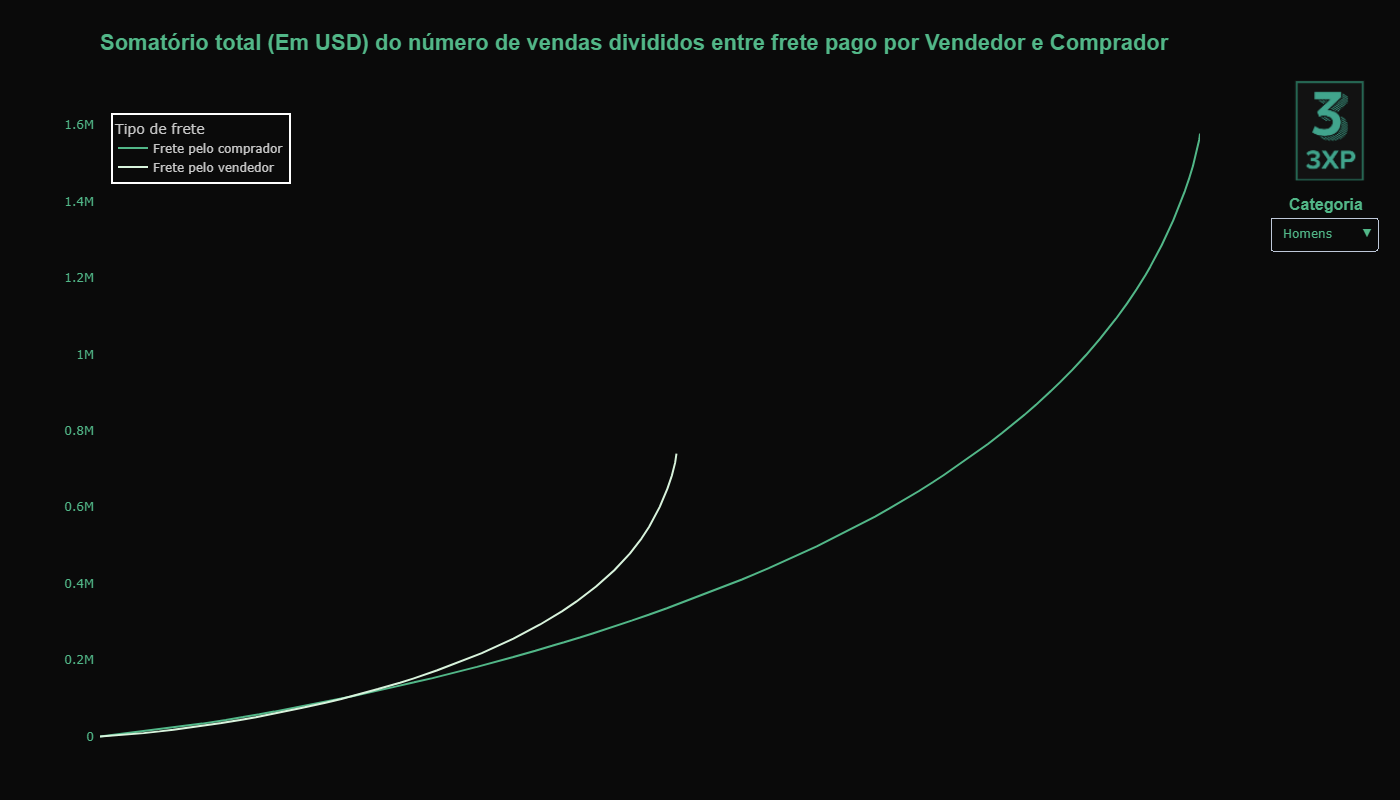

In [ ]:
fig = go.Figure()

fig.add_trace(
      go.Scatter
      (
      x = condicao['Homens'][1].index.values,
      y = condicao['Homens'][1].values,
      name = 'Frete pelo comprador',
      marker_color = '#52b788',
      showlegend = True,
    )
)

fig.add_trace(
      go.Scatter
      (
      x = condicao['Homens'][0].index.values,
      y = condicao['Homens'][0].values,
      name = 'Frete pelo vendedor',
      marker_color = '#d8f3dc',
      showlegend = True
    )
)


fig.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Somatório total (Em USD) do número de vendas divididos entre frete pago por Vendedor e Comprador</br>',
                'font_family':"Arial",
                'font_size':14,
                'xref' :'paper',
                'y': 0.96,
                'x': 0,
                'xanchor': 'left',
                'yanchor': 'bottom'},
        margin=dict(
        l=100,
        r=200,
        b=30,
        t=100,
        pad=5
        ),
        width=1400,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"type": "scatter",'y': [condicao['Homens'][1].values, condicao['Homens'][0].values], 'x': [condicao['Homens'][1].index.values, condicao['Homens'][0].index.values]}],
                    label="Homens",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Beleza'][1].values,condicao['Beleza'][0].values], 'x': [condicao['Beleza'][1].index.values,condicao['Beleza'][0].index.values]}],
                    label="Beleza",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Outro'][1].values,condicao['Outro'][0].values], 'x': [condicao['Outro'][1].index.values,condicao['Outro'][0].index.values]}],
                    label="Outro",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Casa'][1].values,condicao['Casa'][0].values], 'x': [condicao['Casa'][1].index.values,condicao['Casa'][0].index.values]}],
                    label="Casa",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Criancas'][1].values,condicao['Criancas'][0].values], 'x': [condicao['Criancas'][1].index.values,condicao['Criancas'][0].index.values]}],
                    label="Criancas",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Eletronicos'][1].values,condicao['Eletronicos'][0].values], 'x': [condicao['Eletronicos'][1].index.values,condicao['Eletronicos'][0].index.values]}],
                    label="Eletronicos",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Mulher'][1].values,condicao['Mulher'][0].values], 'x': [condicao['Mulher'][1].index.values,condicao['Mulher'][0].index.values]}],
                    label="Mulher",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "scatter", 'y': [condicao['Esporte'][1].values,condicao['Esporte'][0].values], 'x': [condicao['Esporte'][1].index.values,condicao['Esporte'][0].index.values]}],
                    label="Esporte",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.17,
            xanchor="right",
            y=0.84,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
    ],
    yaxis = dict(tickfont=dict(color="#52b788")),
    legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="left",
    x=0.01,
    font_color = "rgb(200,200,200)",
    title = 'Tipo de frete',
    bordercolor="rgb(256,256,256)",
    bgcolor = 'rgb(10,10,10)',
    borderwidth=2
))

fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.15, y=0.86,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.15, y=0.88,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)

fig.update_xaxes(showgrid=False, visible = False)
fig.update_yaxes(showgrid=False, zerolinecolor = 'rgb(10,10,10)')

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show() 

# COMENTÁRIOS SOBRE A HIPÓTESE



Em relação a tempo, os dados fornecem uma visão totalmente errada da realidade, comparando com o gráfico apresentado das empresas do Mercado Livre, Americanas, Submarino, Netshoes e Maganize Luiza, ele não apresenta uma sazonalidade viável, podemos dizer que eles mais parecem um exame médico do que uma sazonalidade, então podemos descartar a coluna tempo, por conta de conter dados que não irão ajudar dentro dos modelos de inteligência artificial, com isso a hipótese de sazonalidade de torna <b>FALSA</b>, ela não impacta em nada nos dados.

Em relação ao frete, podemos concluir é bem variado em relação a categoria, temos categorias em que os produtos que são fretados pelo comprador são mais caros e temos outras que são totalmente o contrário então a hipótese pode ser concluida sendo uma contradição (contradição pode ser definida quando uma hipótese contêm saídas tanto verdadeiras como falsas)